In [1]:
import pandas as pd

C:\Users\Dell\AppData\Local\Temp\ipykernel_11004\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [9]:
df.tail()

,id,mean_dist_day,mean_over_speed_perc
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5
3999,3423311533,168.03,9


In [10]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [11]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


<Axes: xlabel='id', ylabel='mean_dist_day'>

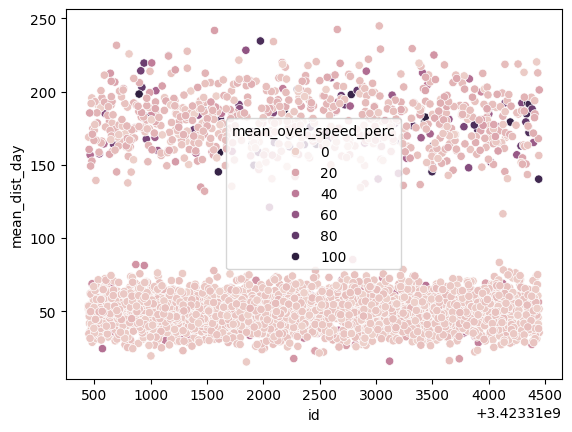

In [14]:
import seaborn as sns

sns.scatterplot(data = df, x = 'id', y = 'mean_dist_day', hue = 'mean_over_speed_perc')

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['id', 'mean_dist_day']], df[['mean_over_speed_perc']], test_size=0.33, random_state=0)

In [18]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='mean_dist_day', ylabel='id'>

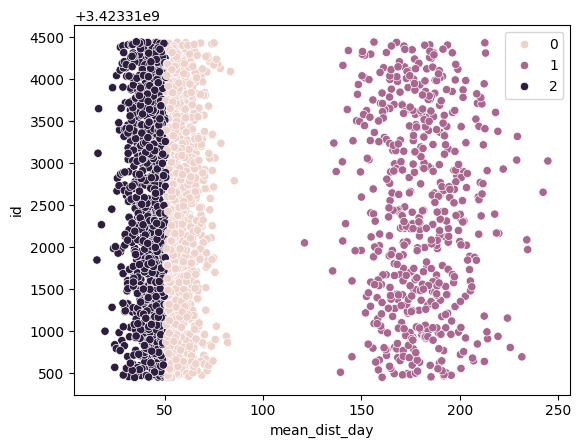

In [21]:
sns.scatterplot(data = X_train, x = 'mean_dist_day', y = 'id', hue = kmeans.labels_)

<Axes: ylabel='mean_over_speed_perc'>

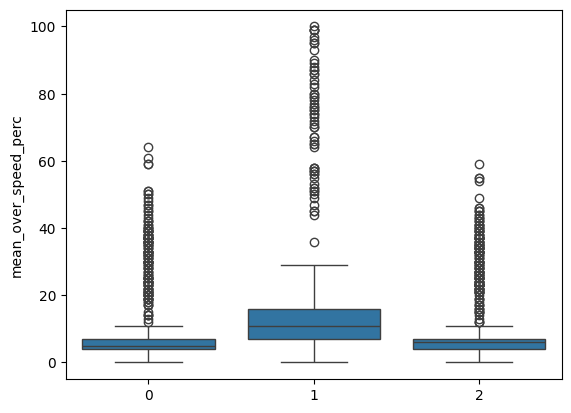

In [22]:
sns.boxplot(x = kmeans.labels_, y = y_train['mean_over_speed_perc'])

In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.2545746421812123

In [25]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='mean_dist_day', ylabel='id'>

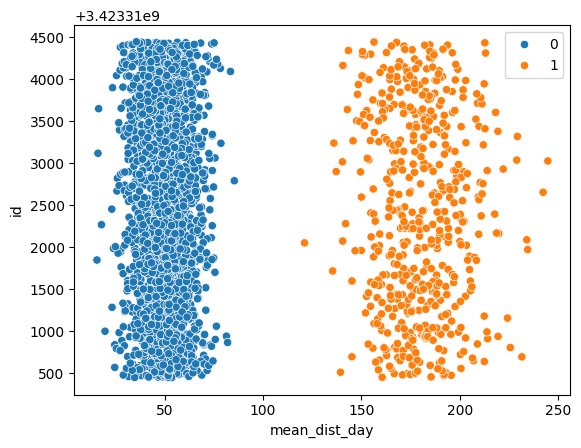

In [26]:
sns.scatterplot(data = X_train, x = 'mean_dist_day', y = 'id', hue = fits[0].labels_)

<Axes: xlabel='mean_dist_day', ylabel='id'>

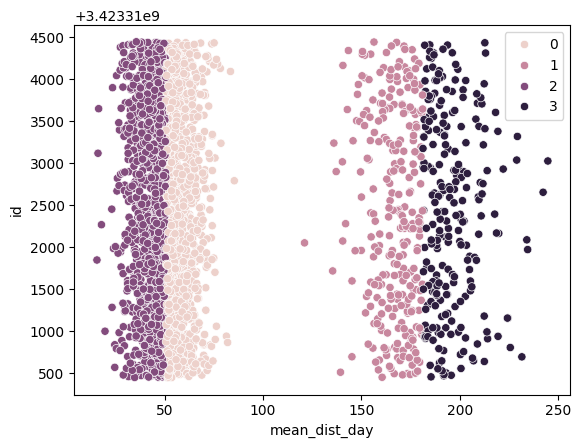

In [27]:
sns.scatterplot(data = X_train, x = 'mean_dist_day', y = 'id', hue = fits[2].labels_)

In [28]:
kmeans.labels_[:5]

array([2, 0, 0, 1, 2])

<Axes: >

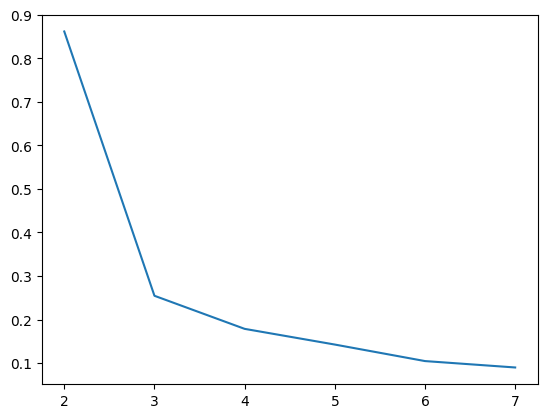

In [29]:
sns.lineplot(x=K,y=score)

<Axes: xlabel='mean_dist_day', ylabel='id'>

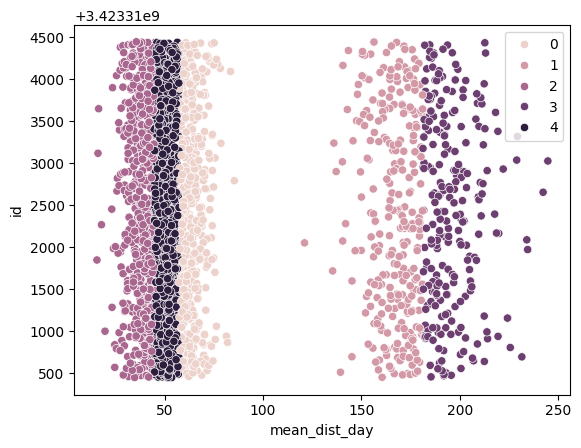

In [30]:
sns.scatterplot(data = X_train, x = 'mean_dist_day', y = 'id', hue = fits[3].labels_)

<Axes: ylabel='mean_over_speed_perc'>

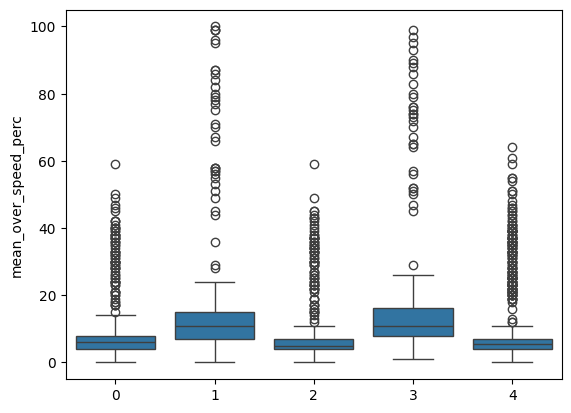

In [32]:
sns.boxplot(x = fits[3].labels_, y = y_train['mean_over_speed_perc'])

In [40]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [41]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [42]:
features[:5]
true_labels[:5]

array([1, 0, 2, 2, 2])

In [43]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [44]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [45]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [46]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [47]:
# The lowest SSE value
kmeans.inertia_
# Final locations of the centroid
kmeans.cluster_centers_
# The number of iterations required to converge
kmeans.n_iter_

10

In [48]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [49]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [50]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

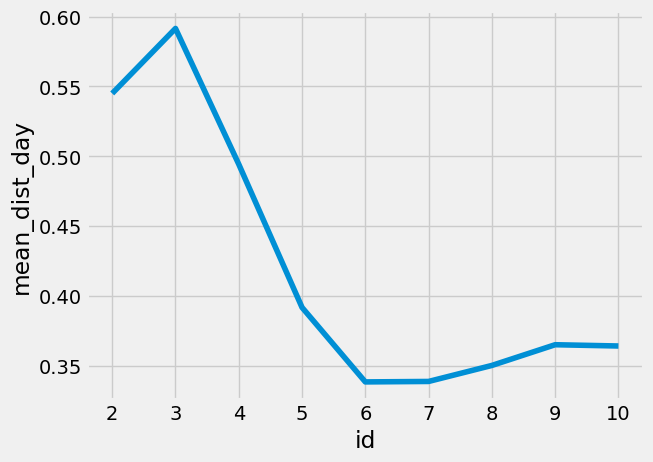

In [51]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("id")
plt.ylabel("mean_dist_day")
plt.show()